The `.mat` files produced from `robust_no_recalibrate_gbm.m` and `robust_no_recalibrate_delta.m`

See also: [ChiUpsilonDelta.ipynb](https://github.com/jlperla/PerlaTonettiWaugh.jl/blob/master/ChiUpsilonDelta.ipynb)

In [1]:
import pandas as pd
import scipy.io
import os
import matplotlib.pyplot as plt

path = os.getcwd() + "/"

fig_path = "figures/"

### GBM

In [2]:
cnames = ['gold', 'gnew', 'gdiff', "welfare", 'upsilon']

mat = scipy.io.loadmat(path + "norecalibrate_values_gbm_1.mat")
nocaldf = pd.DataFrame(mat["record_values"])
nocaldf.columns = cnames
nocaldf["gdiff"] = -nocaldf["gdiff"] 

nocaldf.sort_values(["upsilon"], inplace = True)

In [3]:
mat = scipy.io.loadmat(path + "norecalibrate_values_gbm_0.9.mat")

nocaldf_lowchi = pd.DataFrame(mat["record_values"])

nocaldf_lowchi.columns = cnames
nocaldf_lowchi["gdiff"] = -nocaldf_lowchi["gdiff"] 

nocaldf_lowchi.sort_values(["upsilon"], inplace = True)

In [4]:
mat = scipy.io.loadmat(path + "norecalibrate_values_gbm_1.1.mat")

nocaldf_higchi = pd.DataFrame(mat["record_values"])

nocaldf_higchi.columns = cnames
nocaldf_higchi["gdiff"] = -nocaldf_higchi["gdiff"] 
nocaldf_higchi.sort_values(["upsilon"], inplace = True)

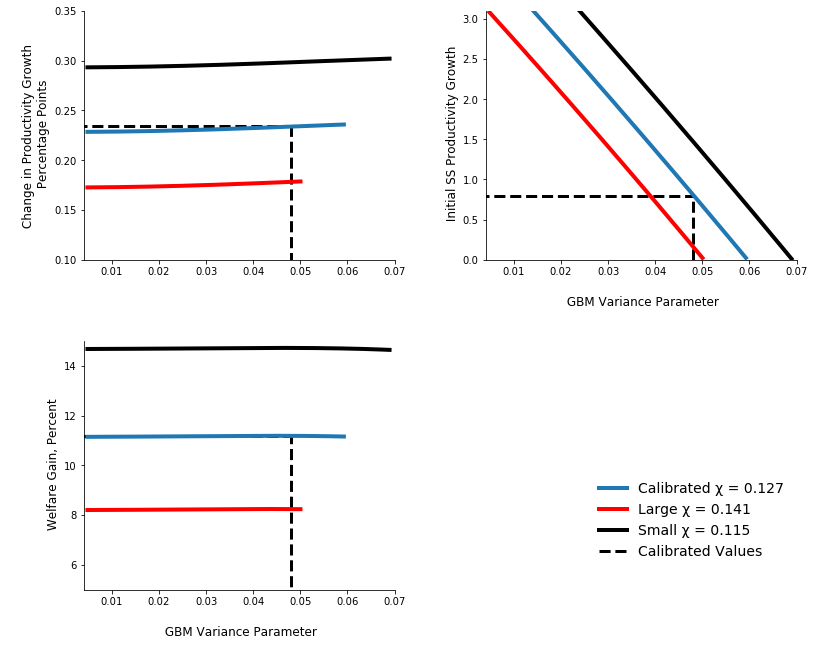

In [5]:
fig, ax = plt.subplots(2,2,figsize = (12,10))

fig.tight_layout(pad = 6)


position = (0,0)

ax[position].plot(nocaldf.upsilon, 100*nocaldf["gdiff"], lw = 4)

ax[position].plot(nocaldf_lowchi.upsilon, 100*nocaldf_lowchi["gdiff"], lw = 4, color = 'r')

ax[position].plot(nocaldf_higchi.upsilon, 100*nocaldf_higchi["gdiff"], lw = 4, color = 'k')

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.004,0.07)
ax[position].set_ylim(0.10,0.35)
#ax[position].set_xlabel("\n GBM Variance Parameter", fontsize = 12)
ax[position].set_ylabel("\n Change in Productivity Growth \n Percentage Points", fontsize = 12)

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)

ax[position].vlines(0.048, 0.00, 0.234,           # Set the value equall to the average
           color='k',       # make the color red
           #label='Trade Shock', # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].hlines(0.234, -0.001, 0.048 ,           # Set the value equall to the average
           color='k',       # make the color red
           label="Calibrated Values", # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line


######################################################################################################

position = (0,1)

ax[position].plot(nocaldf.upsilon, 100*nocaldf["gold"], lw = 4,  label = "Calibrated χ = 0.127")

ax[position].plot(nocaldf_lowchi.upsilon, 100*nocaldf_lowchi["gold"], lw = 4, color = 'red', label = "Large χ = 0.141")

ax[position].plot(nocaldf_higchi.upsilon, 100*nocaldf_higchi["gold"], lw = 4, color = 'k', label = "Small χ = 0.115")

#ax[1].plot(nocaldf_bigchi.upsilon, 100*nocaldf_bigchi["gold"], lw = 4, color = 'k', label = "Large 1/chi")

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.004,0.07)
ax[position].set_ylim(0.0,3.10)
#ax.set_ylim(0,0.40)
ax[position].set_xlabel("\n GBM Variance Parameter", fontsize = 12)
ax[position].set_ylabel("\n Initial SS Productivity Growth", fontsize = 12)

ax[position].hlines(0.79, -0.001, 0.048 ,           # Set the value equall to the average
           color='k',       # make the color red
           label="Calibrated Values", # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].vlines(0.048, 0, 0.79,           # Set the value equall to the average
           color='k',       # make the color red
           #label='Trade Shock', # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)

ax[position].legend(bbox_to_anchor=(0., -1.25, 1., .102),frameon = False, fontsize = 14, loc = 4)

################################################################################################################################

position = (1,0)

series = "welfare"

ax[position].plot(nocaldf.upsilon, 100*nocaldf[series], lw = 4,  label = "Calibrated χ")

ax[position].plot(nocaldf_lowchi.upsilon, 100*nocaldf_lowchi[series], lw = 4, color = 'red', label = "Large χ")

ax[position].plot(nocaldf_higchi.upsilon, 100*nocaldf_higchi[series], lw = 4, color = 'k', label = "Small χ")

#ax[1].plot(nocaldf_bigchi.upsilon, 100*nocaldf_bigchi["gold"], lw = 4, color = 'k', label = "Large 1/chi")

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.004,0.07)
ax[position].set_ylim(5,15)
#ax.set_ylim(0,0.40)
ax[position].set_xlabel("\n GBM Variance Parameter", fontsize = 12)
ax[position].set_ylabel("\n Welfare Gain, Percent", fontsize = 12)

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)


ax[position].vlines(0.048, 0, 11.18,           # Set the value equall to the average
           color='k',       # make the color red
           #label='Trade Shock', # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].hlines(11.18, -0.001, 0.048 ,           # Set the value equall to the average
           color='k',       # make the color red
           label="Calibrated Values", # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

################################################################################################################################
position = (1,1)

ax[position].axis('off')

plt.savefig(fig_path + "gbm_chi.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

### Delta

In [6]:
cnames = ['gold', 'gnew', 'gdiff', "welfare", 'delta']

mat = scipy.io.loadmat(path + "norecalibrate_values_delta_1.mat")

nocaldf = pd.DataFrame(mat["record_values"])

nocaldf.columns = cnames
nocaldf["gdiff"] = -nocaldf["gdiff"] 

nocaldf.sort_values(["delta"], inplace = True)

In [7]:
mat = scipy.io.loadmat(path + "norecalibrate_values_delta_0.9.mat")

nocaldf_lowchi = pd.DataFrame(mat["record_values"])

nocaldf_lowchi.columns = cnames
nocaldf_lowchi["gdiff"] = -nocaldf_lowchi["gdiff"] 

nocaldf_lowchi.sort_values(["delta"], inplace = True)

In [8]:
mat = scipy.io.loadmat(path + "norecalibrate_values_delta_1.1.mat")

nocaldf_higchi = pd.DataFrame(mat["record_values"])

nocaldf_higchi.columns = cnames
nocaldf_higchi["gdiff"] = -nocaldf_higchi["gdiff"]

nocaldf_higchi.sort_values(["delta"], inplace = True)

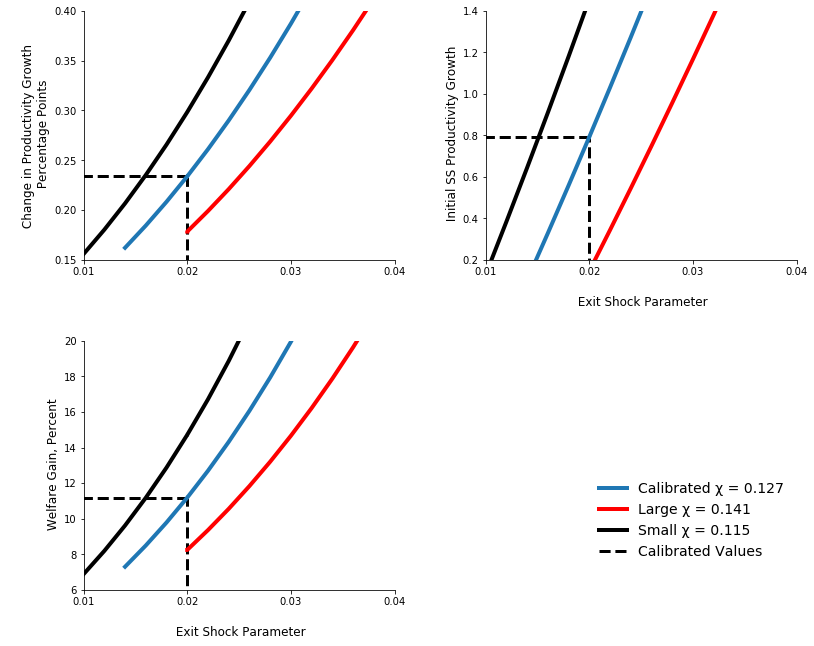

In [9]:
fig, ax = plt.subplots(2,2,figsize = (12,10))

fig.tight_layout(pad = 6)


position = (0,0)

ax[position].plot(nocaldf.delta, 100*nocaldf["gdiff"], lw = 4)

ax[position].plot(nocaldf_lowchi.delta, 100*nocaldf_lowchi["gdiff"], lw = 4, color = 'r')

ax[position].plot(nocaldf_higchi.delta, 100*nocaldf_higchi["gdiff"], lw = 4, color = 'k')

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.01,0.04)
ax[position].set_ylim(0.15,0.4)
#ax[position].set_xlabel("\n GBM Variance Parameter", fontsize = 12)
ax[position].set_ylabel("\n Change in Productivity Growth \n Percentage Points", fontsize = 12)

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)

ax[position].vlines(0.020, 0.00, 0.234,           # Set the value equall to the average
           color='k',       # make the color red
           #label='Trade Shock', # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].hlines(0.234, -0.001, 0.020 ,           # Set the value equall to the average
           color='k',       # make the color red
           label="Calibrated Values", # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line


######################################################################################################

position = (0,1)

ax[position].plot(nocaldf.delta, 100*nocaldf["gold"], lw = 4,  label = "Calibrated χ = 0.127")

ax[position].plot(nocaldf_lowchi.delta, 100*nocaldf_lowchi["gold"], lw = 4, color = 'red', label = "Large χ = 0.141")

ax[position].plot(nocaldf_higchi.delta, 100*nocaldf_higchi["gold"], lw = 4, color = 'k', label = "Small χ = 0.115")

#ax[1].plot(nocaldf_bigchi.upsilon, 100*nocaldf_bigchi["gold"], lw = 4, color = 'k', label = "Large 1/chi")

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.01,0.04)
ax[position].set_ylim(0.20,1.4)
#ax.set_ylim(0,0.40)
ax[position].set_xlabel("\n Exit Shock Parameter", fontsize = 12)
ax[position].set_ylabel("\n Initial SS Productivity Growth", fontsize = 12)

ax[position].vlines(0.02, 0.00, 0.79,           # Set the value equall to the average
           color='k',       # make the color red
           #label='Trade Shock', # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].hlines(0.79, -0.001, 0.020 ,           # Set the value equall to the average
           color='k',       # make the color red
           label="Calibrated Values", # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)

ax[position].legend(bbox_to_anchor=(0., -1.25, 1., .102),frameon = False, fontsize = 14, loc = 4)

################################################################################################################################

position = (1,0)

series = "welfare"

ax[position].plot(nocaldf.delta, 100*nocaldf[series], lw = 4,  label = "Calibrated χ")

ax[position].plot(nocaldf_lowchi.delta, 100*nocaldf_lowchi[series], lw = 4, color = 'red', label = "Large χ")

ax[position].plot(nocaldf_higchi.delta, 100*nocaldf_higchi[series], lw = 4, color = 'k', label = "Small χ")

#ax[1].plot(nocaldf_bigchi.upsilon, 100*nocaldf_bigchi["gold"], lw = 4, color = 'k', label = "Large 1/chi")

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.01,0.04)
ax[position].set_ylim(6,20)
#ax.set_ylim(0,0.40)
ax[position].set_xlabel("\n Exit Shock Parameter", fontsize = 12)
ax[position].set_ylabel("\n Welfare Gain, Percent", fontsize = 12)

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)


ax[position].vlines(0.02, 0, 11.18,           # Set the value equall to the average
           color='k',       # make the color red
           #label='Trade Shock', # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].hlines(11.18, -0.001, 0.02 ,           # Set the value equall to the average
           color='k',       # make the color red
           label="Calibrated Values", # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

################################################################################################################################
position = (1,1)

ax[position].axis('off')

plt.savefig(fig_path + "delta_chi.pdf", bbox_inches = "tight", dip = 3600)

plt.show()